**Auswertung zu S301:**

- Reward scheint allgemein kompliziert zu lernen
- Längere Laufzeit hat (einmal wieder) nichts gebracht (Reward wohl wirklich schwer)
- Problem: Es gibt weiterhin viele kleine Setpoint-Änderungen in der Nacht, dies ist nicht erwünscht und am Tag gibt es (trotzdem dass nur ein Raum, SPACE2-1 trainiert wird) immer noch mehr Wunschtemp-Verletzungen als in der Baseline (!). Die negativen Reward-Signale von "Fehlern" des Agenten für SPACE2-1 gehen im Vergleich zu den anderen fast unter.

- **Idee: Ein Agent im Brodcast Modus**

**Auswertung zu s302:**

- same problems as for s301, so it might be good to change the reward
- **Idea:** instead of current energy consumption **use differential of energy consumption and clip this**, see last cells for a good clipping value (+/- 80 seems to be good)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s301/20210601-2225/",
            "../checkpoints/s301-faster/20210601-2228/",
            "../checkpoints/s302/20210604-1213/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                            baseline_rule-based   
ddqn_new                                               0   
lr                                                  0.01   
batch_size                                           128   
lambda_rwd_mstpc                                     0.1   
lambda_rwd_energy                                  5e-06   
energy_cons_in_kWh                                     0   
log_rwd_energy                                         0   
reward_offset                                        0.0   
clip_econs_at                                        0.0   
soften_instead_of_clipping                             0   
ddqn_loss                                             L2   
target_network_update_freq                             3   
epsilon_final_step                                   100   
epsilon_decay_mode                           exponential   
episodes_count                                       100   
agent_network                     2HiddenLayer,Trapezium   
agent_init_gain                                      0.8   
use_layer_normalization                                0   
fewer_q_values                                         0   
agent_w_l2                                         1e-05   
network_storage_frequency                             10   
model                            Building_5ZoneAirCooled   
single_setpoint_agent_count                          all   
next_occ_horizont                                      0   
rulebased_setpoint_unoccu_delta                      7.0   

                                                                   s301  \
algorithm                                                          ddqn   
ddqn_new                                                            NaN   
lr                                                                  0.1   
batch_size                                                          256   
lambda_rwd_mstpc                                                    0.1   
lambda_rwd_energy                                                 0.006   
energy_cons_in_kWh                                                  NaN   
log_rwd_energy                                                      NaN   
reward_offset                                                       0.3   
clip_econs_at                                                     150.0   
soften_instead_of_clipping                                          NaN   
ddqn_loss                                                           NaN   
target_network_update_freq                                            2   
epsilon_final_step                                                24480   
epsilon_decay_mode                                               linear   
episodes_count                                                      160   
agent_network                               2HiddenLayer,Trapezium,SiLU   
agent_init_gain                                                     0.7   
use_layer_normalization                                               1   
fewer_q_values                                                        1   
agent_w_l2                                                        1e-06   
network_storage_frequency                                           160   
model                            Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                                one_but2not5   
next_occ_horizont                                                     2   
rulebased_setpoint_unoccu_delta                                     8.0   

                                                            s301-faster  \
algorithm                                                          ddqn   
ddqn_new                                                            NaN   
lr                                                                  0.1   
batch_size                                                          256   
lambda_rwd_mstpc              

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001           s301  \
Number of training episodes                      1.0   24480.000000   
Runtime in s                                     0.0  113068.356349   
Runtime in h                                     0.0      31.407877   
Mean episode runtime in s                        0.0       4.618805   
Mean episode runtime during eval. episode in s   0.0       4.814397   
Mean episode runtime after eval. episode in s    NaN       4.553834   
Mean episode runtime in no eval. episode in s    NaN       4.617575   

                                                 s301-faster          s302  
Number of training episodes                     16000.000000  16000.000000  
Runtime in s                                    74092.132365  63250.584973  
Runtime in h                                       20.581148     17.569607  
Mean episode runtime in s                           4.630758      3.953162  
Mean episode runtime during eval. episode in s      4.820689      4.120984  
Mean episode runtime after eval. episode in s       4.541834      3.902016  
Mean episode runtime in no eval. episode in s       4.629564      3.952106

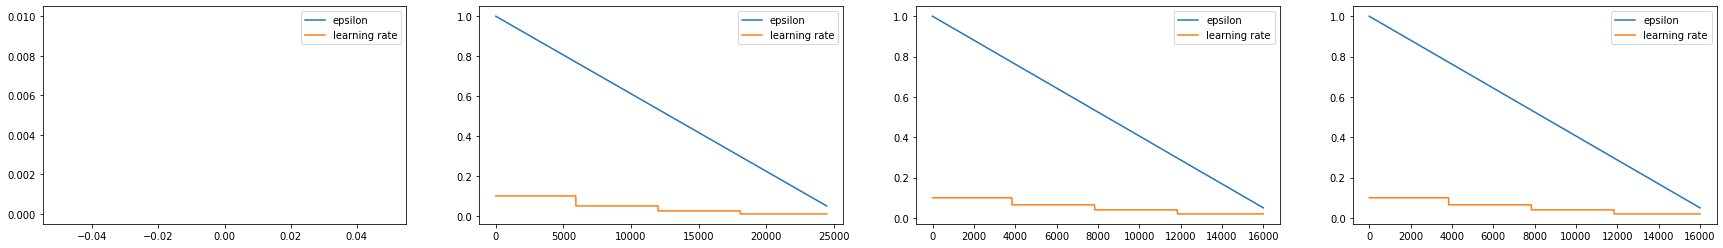

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

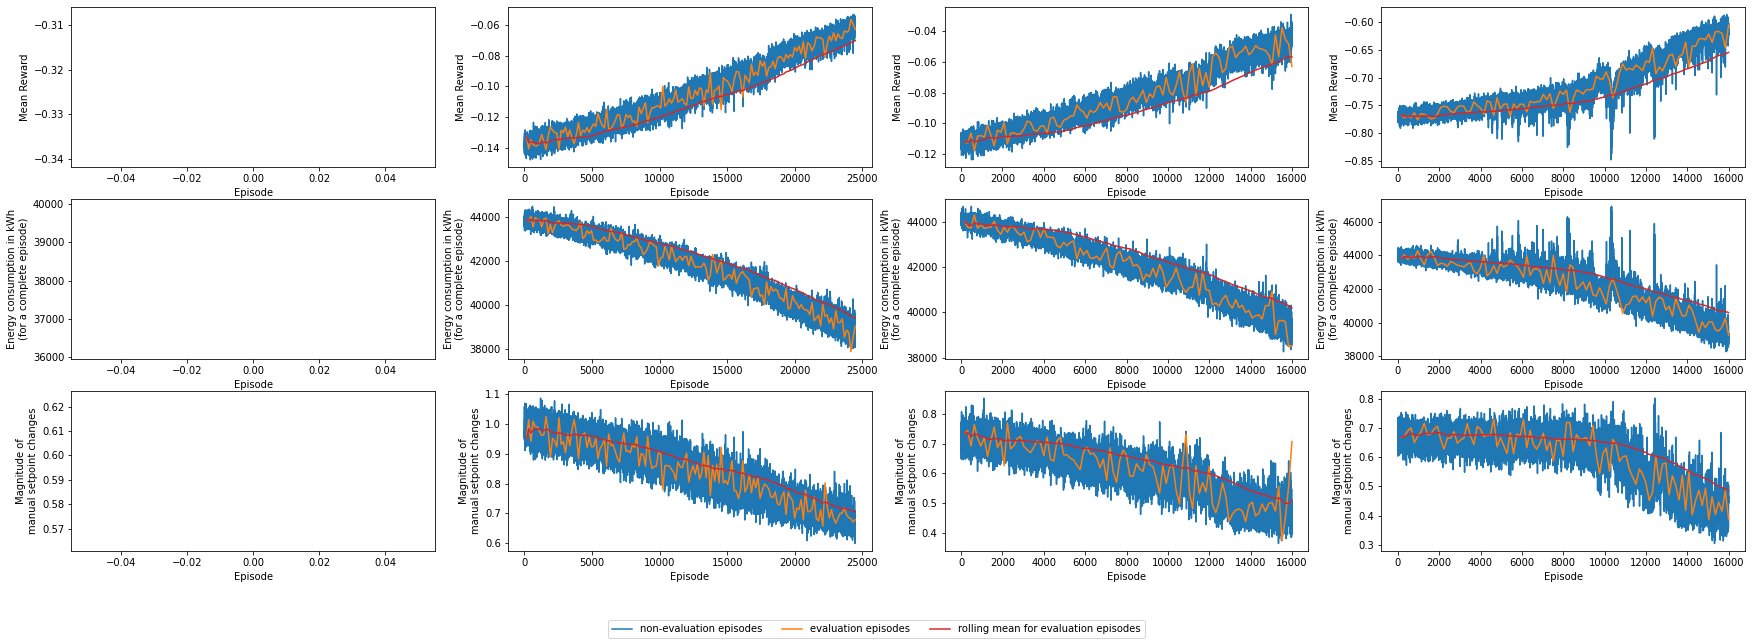

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

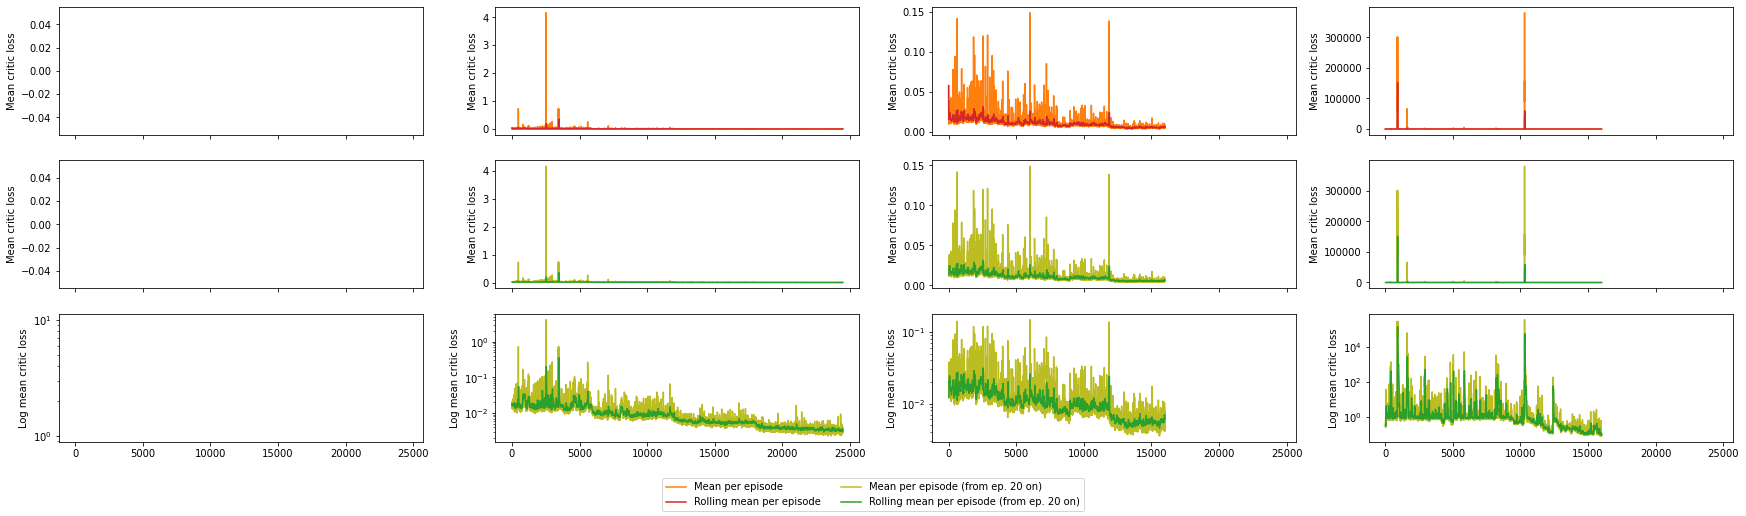

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

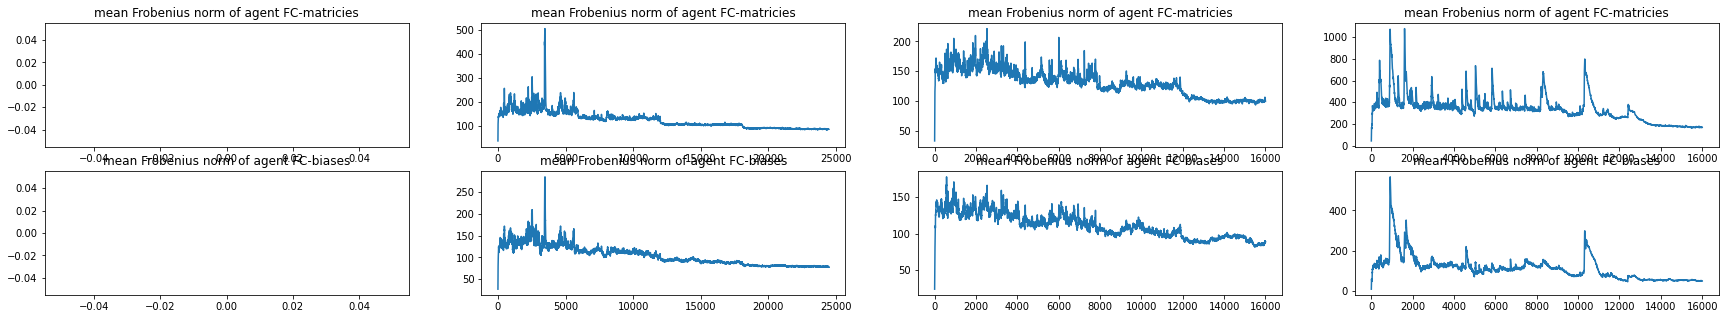

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  24479
Last available evaluation episode for dfs2:  15999
Last available evaluation episode for dfs3:  15999


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Sum of setpoint change magnitudes: 426.88118883889297
For episode 24479: Energy consumption:   39034.07 kWh; Sum of setpoint change magnitudes: 488.4103143331273
For episode 15999: Energy consumption:   38535.25 kWh; Sum of setpoint change magnitudes: 508.15915303705805
For episode 15999: Energy consumption:   39256.84 kWh; Sum of setpoint change magnitudes: 277.6247950711309

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
... 24479: Reward: -0.06274 kWh; Setpoint change magnit.:  0.67929; Energy cons.: 54289.38213
... 15999: Reward: -0.06290 kWh; Setpoint change magnit.:  0.70676; Energy cons.: 53595.61979
... 15999: Reward: -0.60543 kWh; Setpoint change magnit.:  0.38613; Energy cons.: 54599.22642


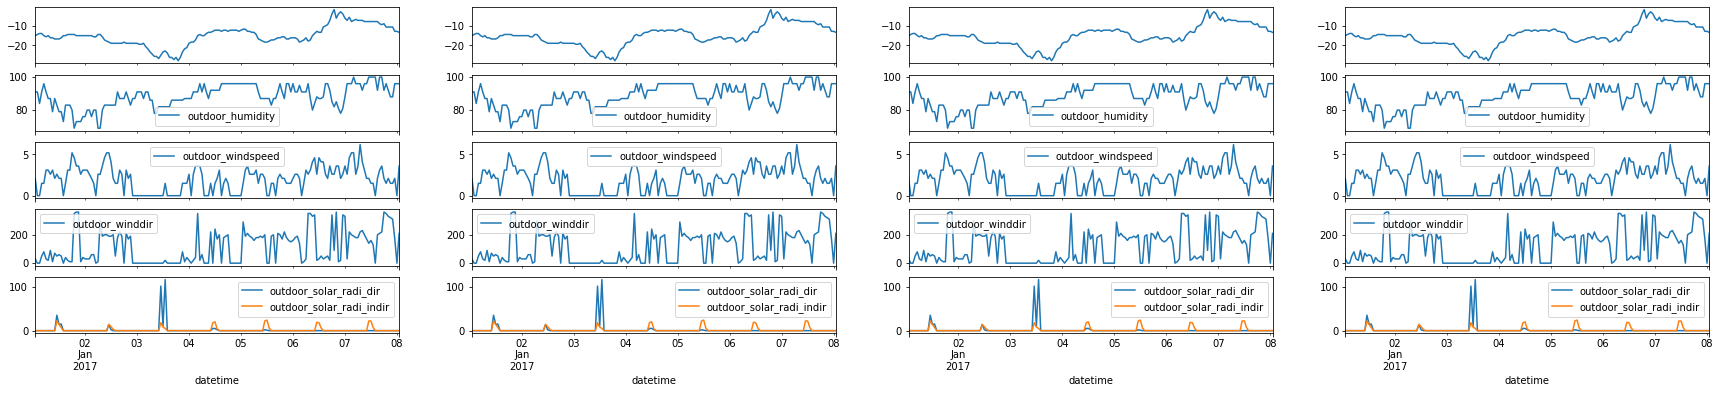

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

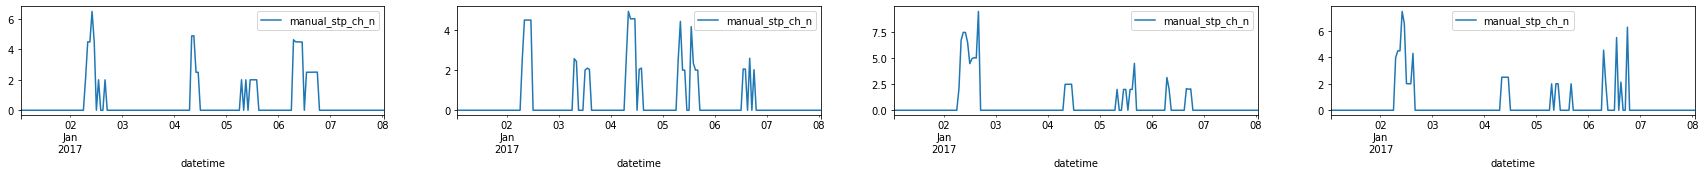

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

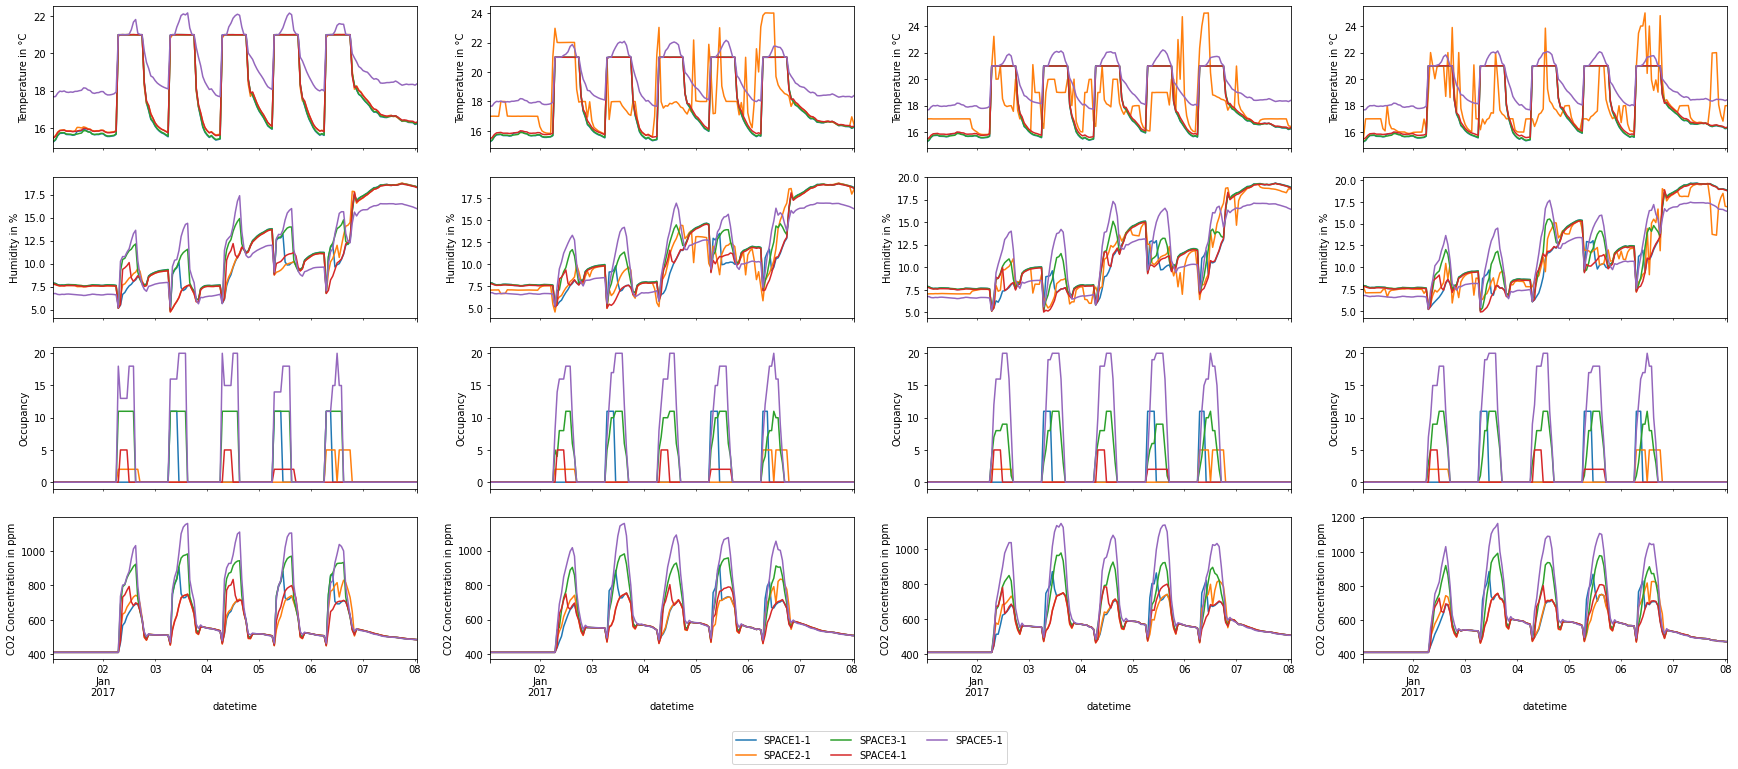

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 



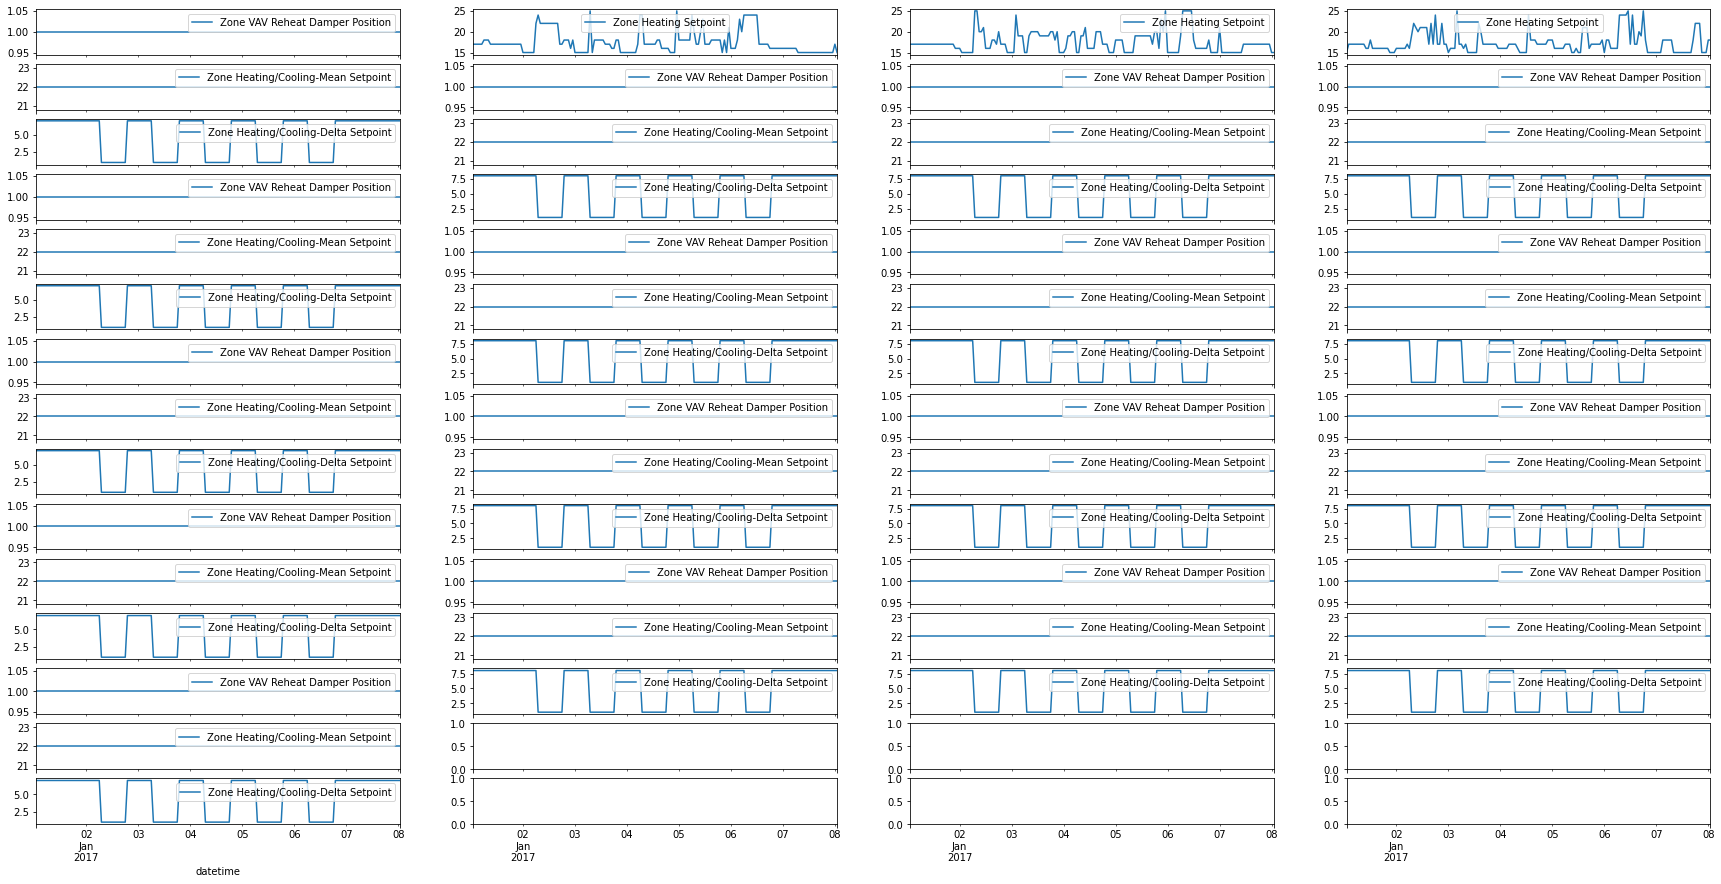

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

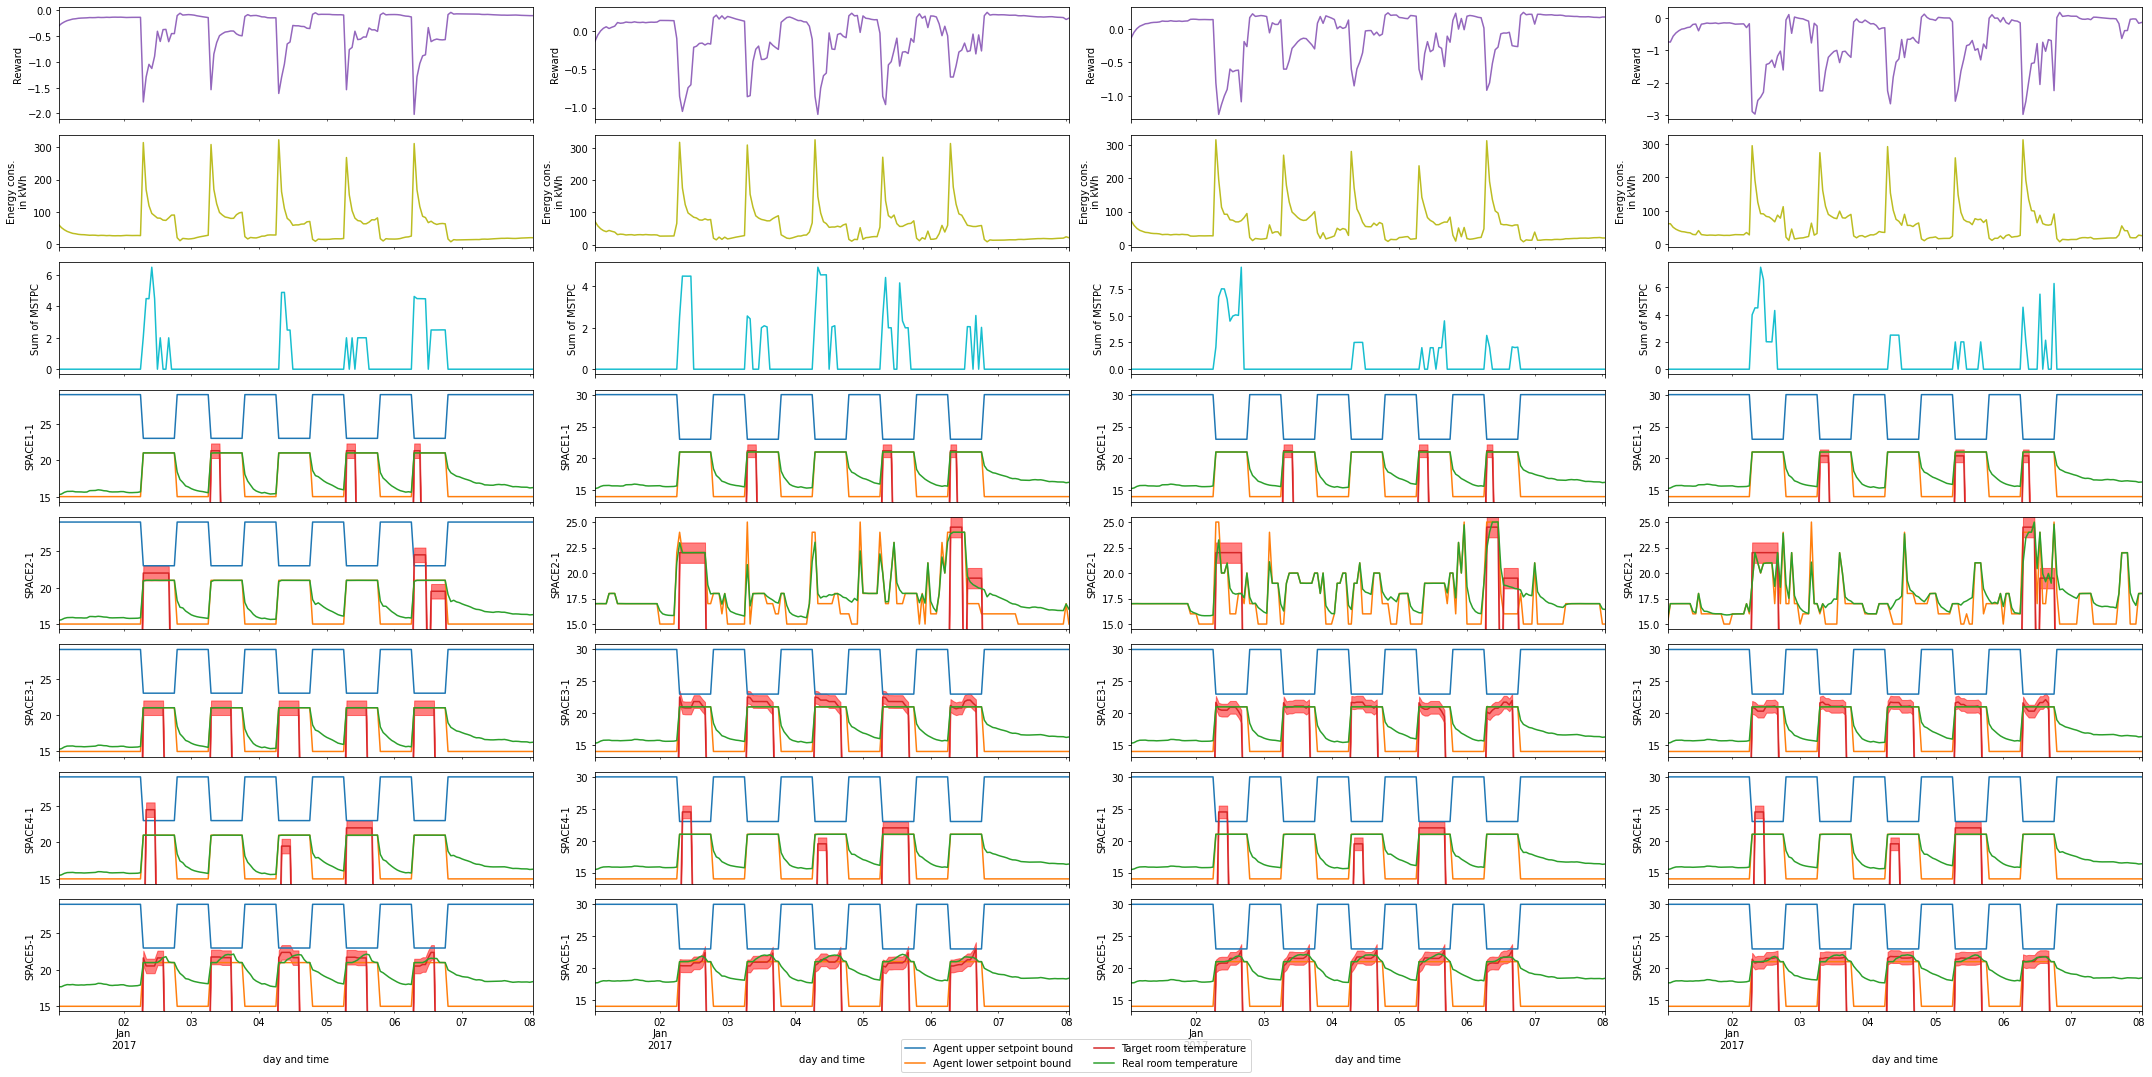

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

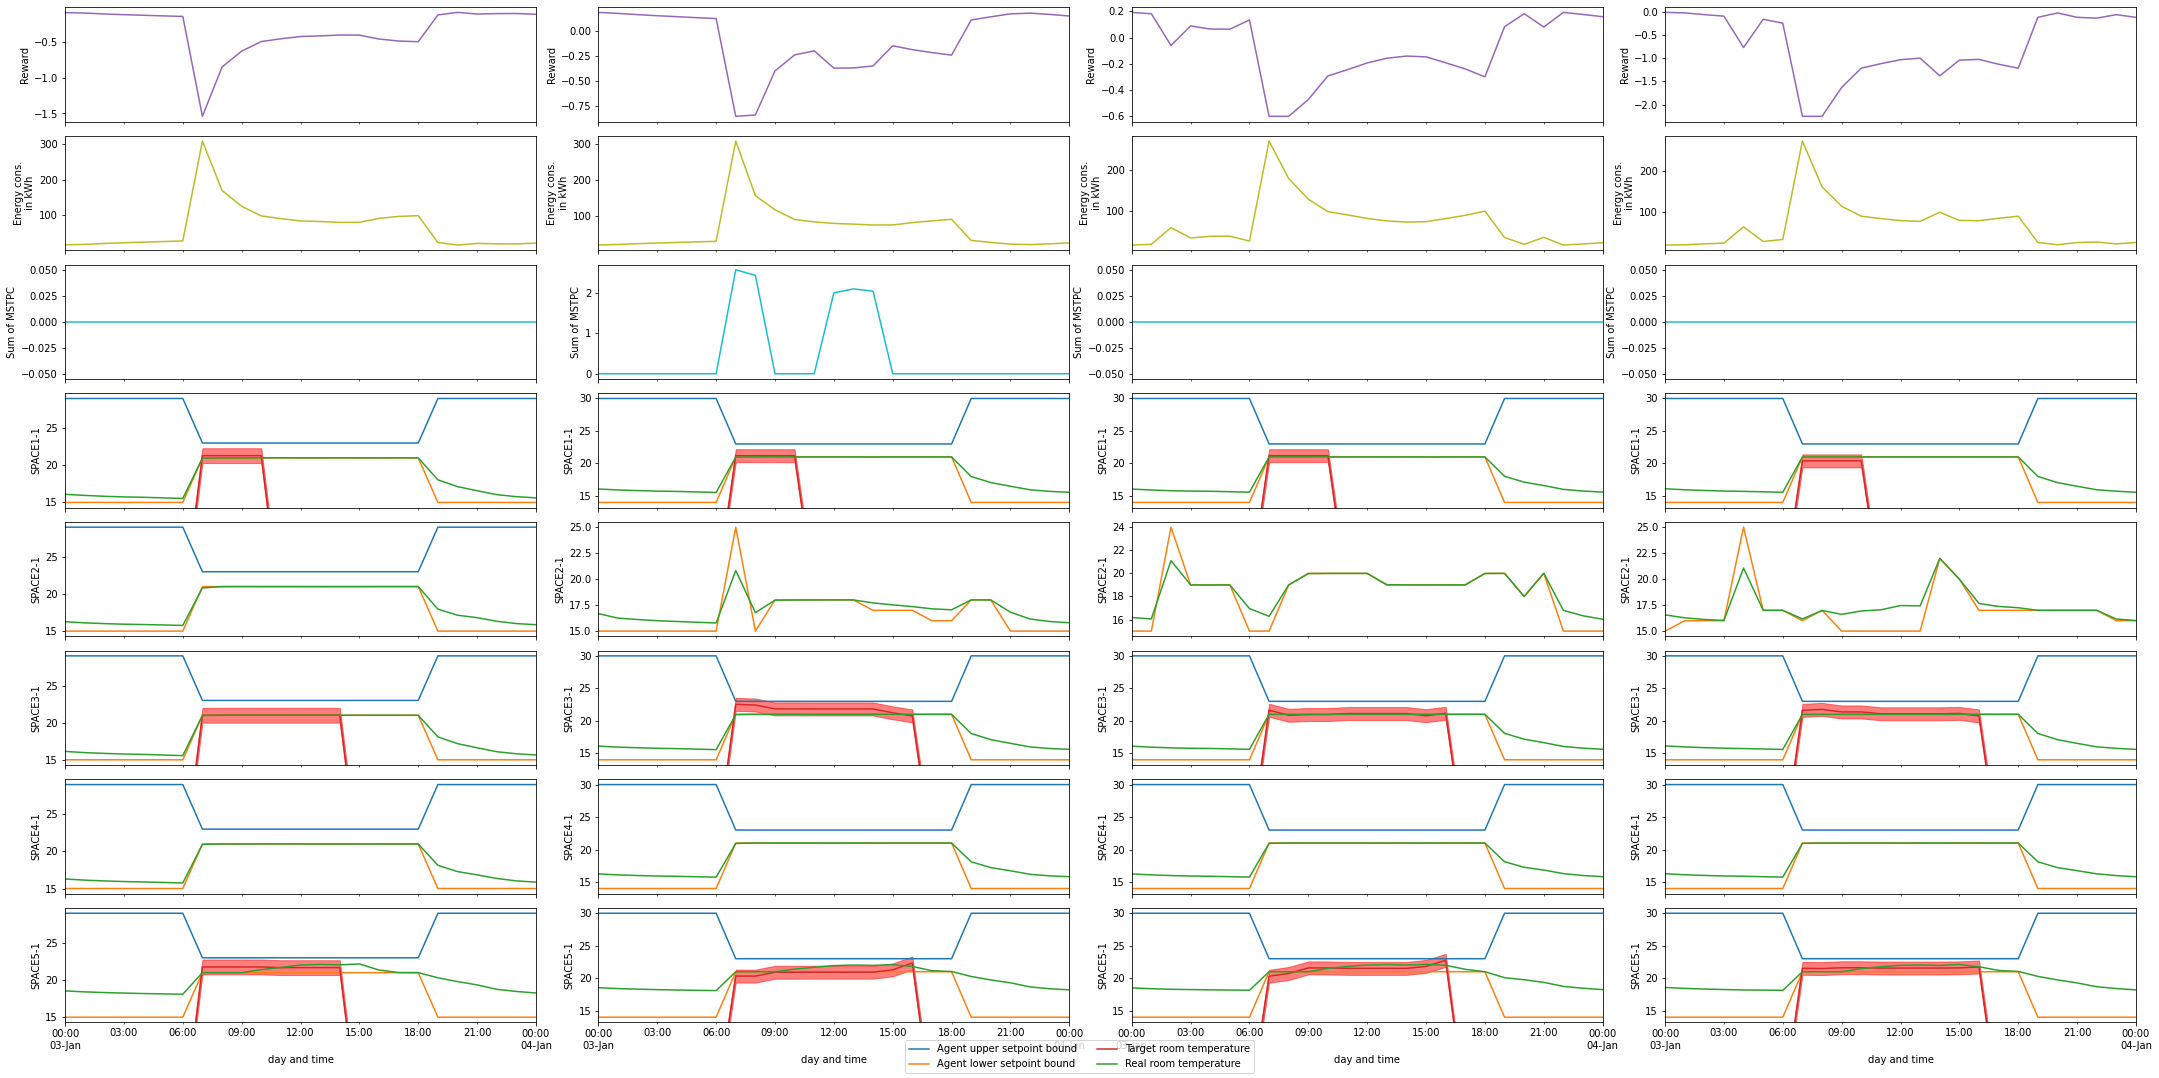

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =  53406.7 Wh, mean reward = -0.0581
For plot number 3, mean energy consumption =  52731.2 Wh, mean reward = -0.0512
For plot number 4, mean energy consumption =  53588.9 Wh, mean reward = -0.5892


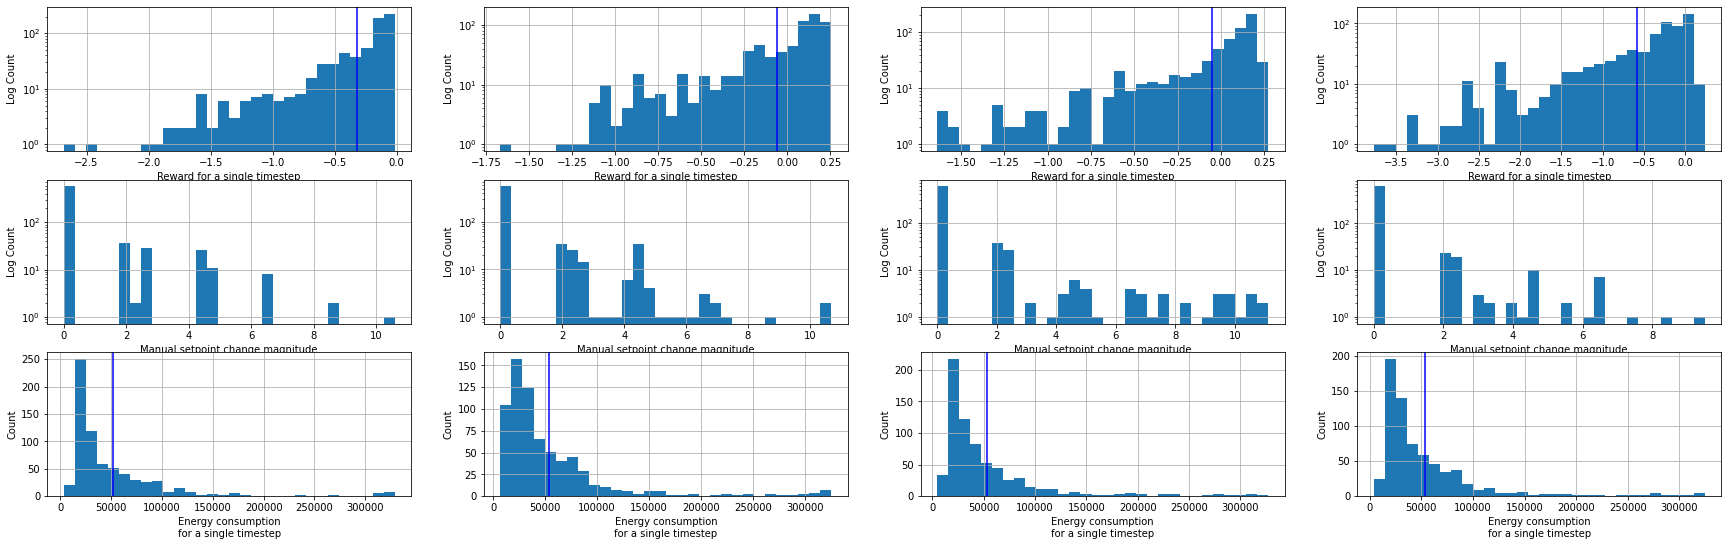

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

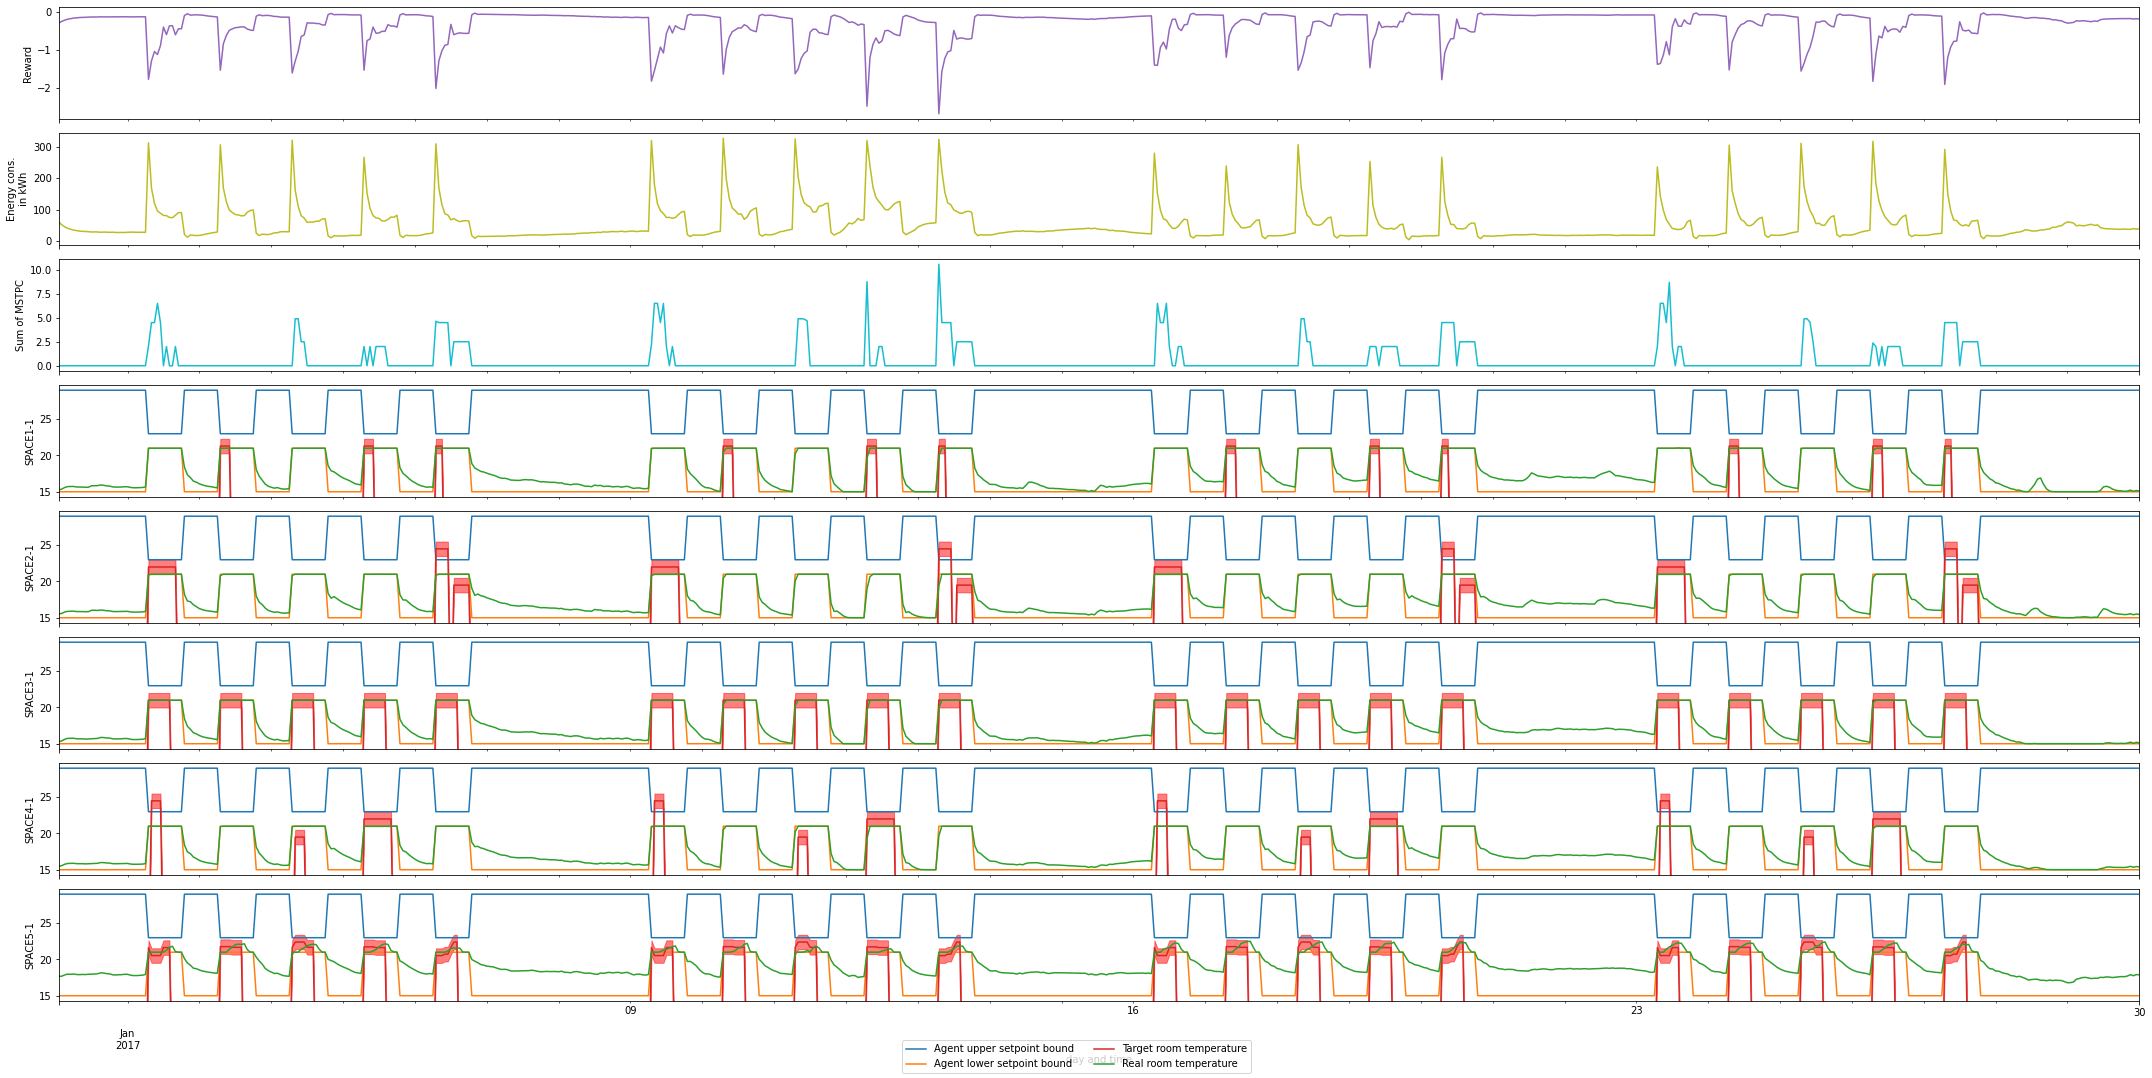

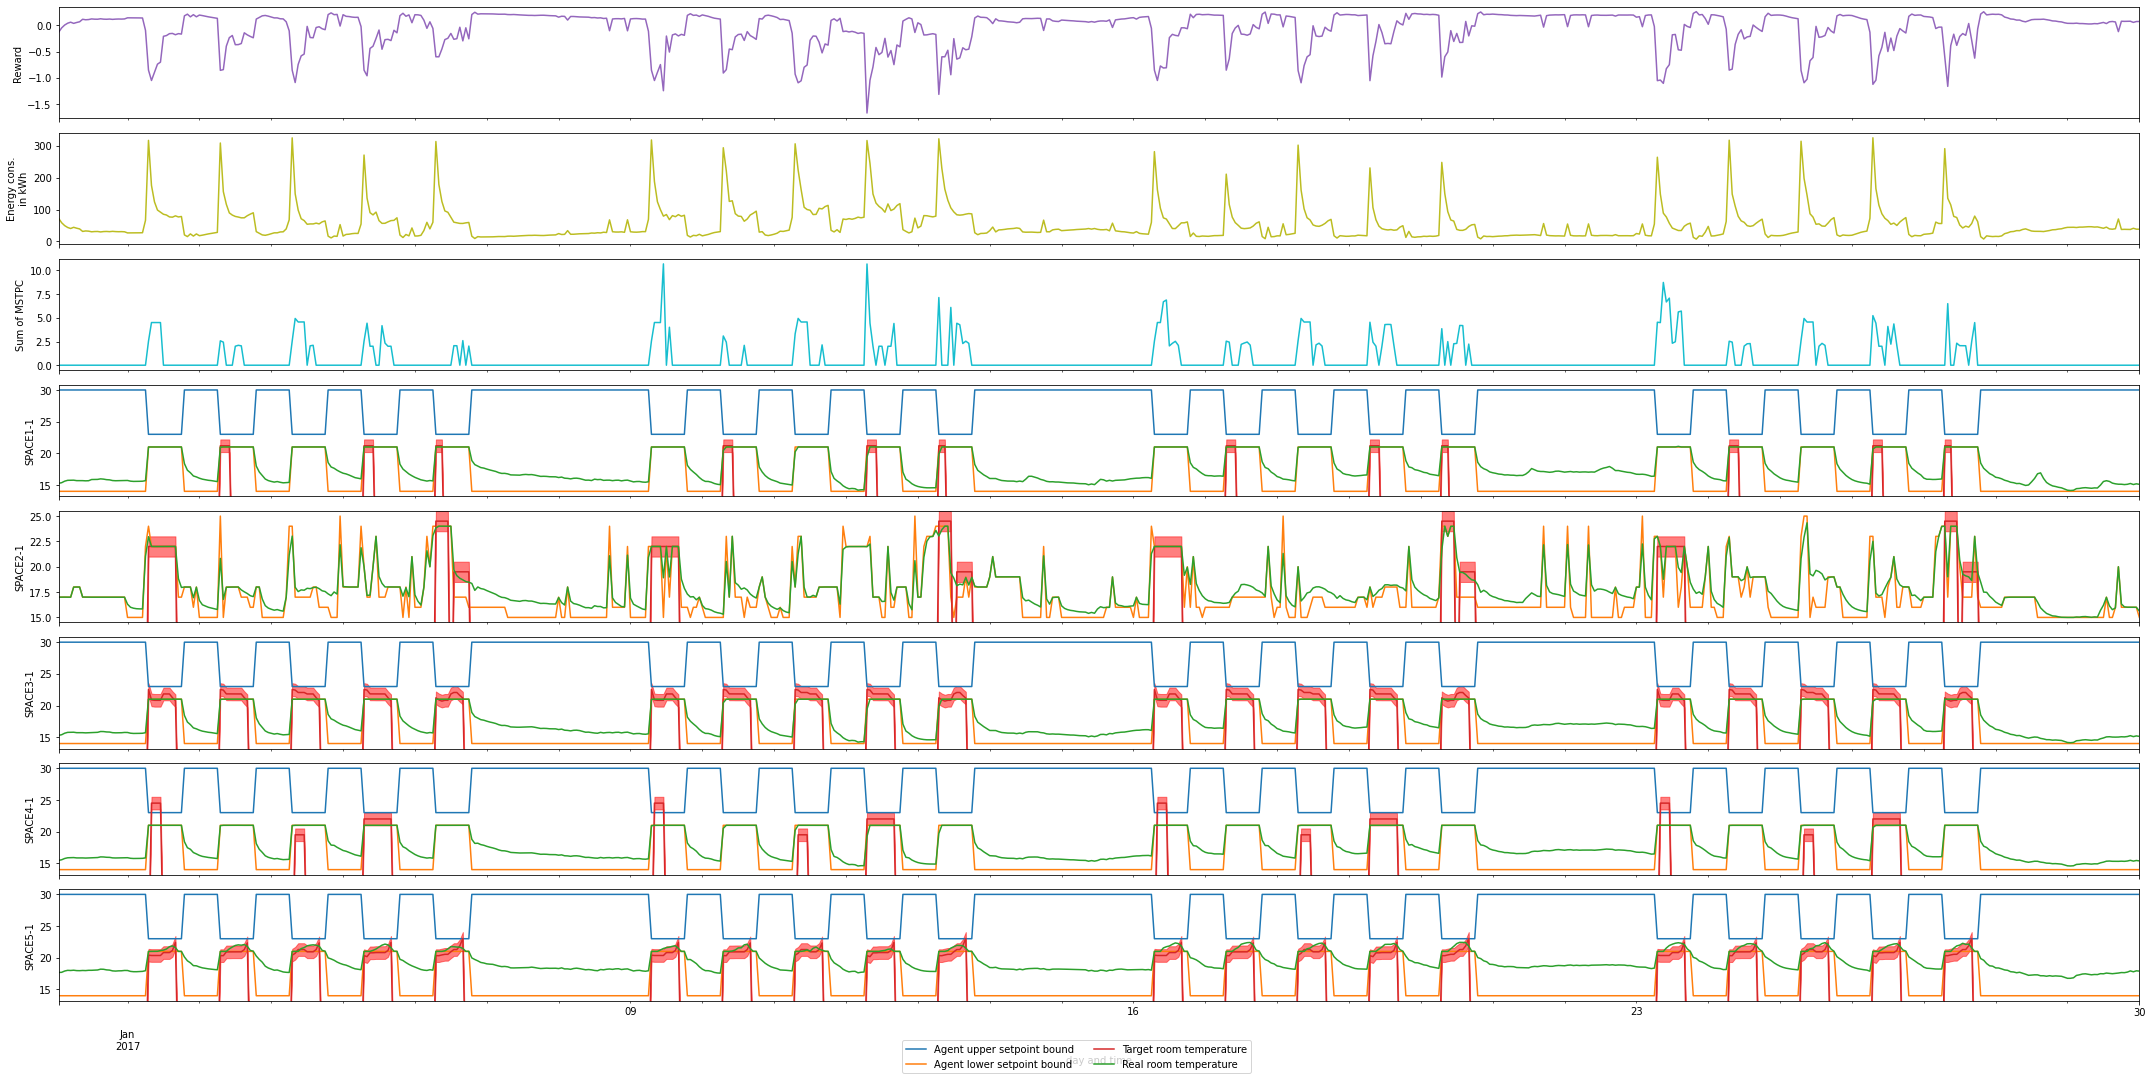

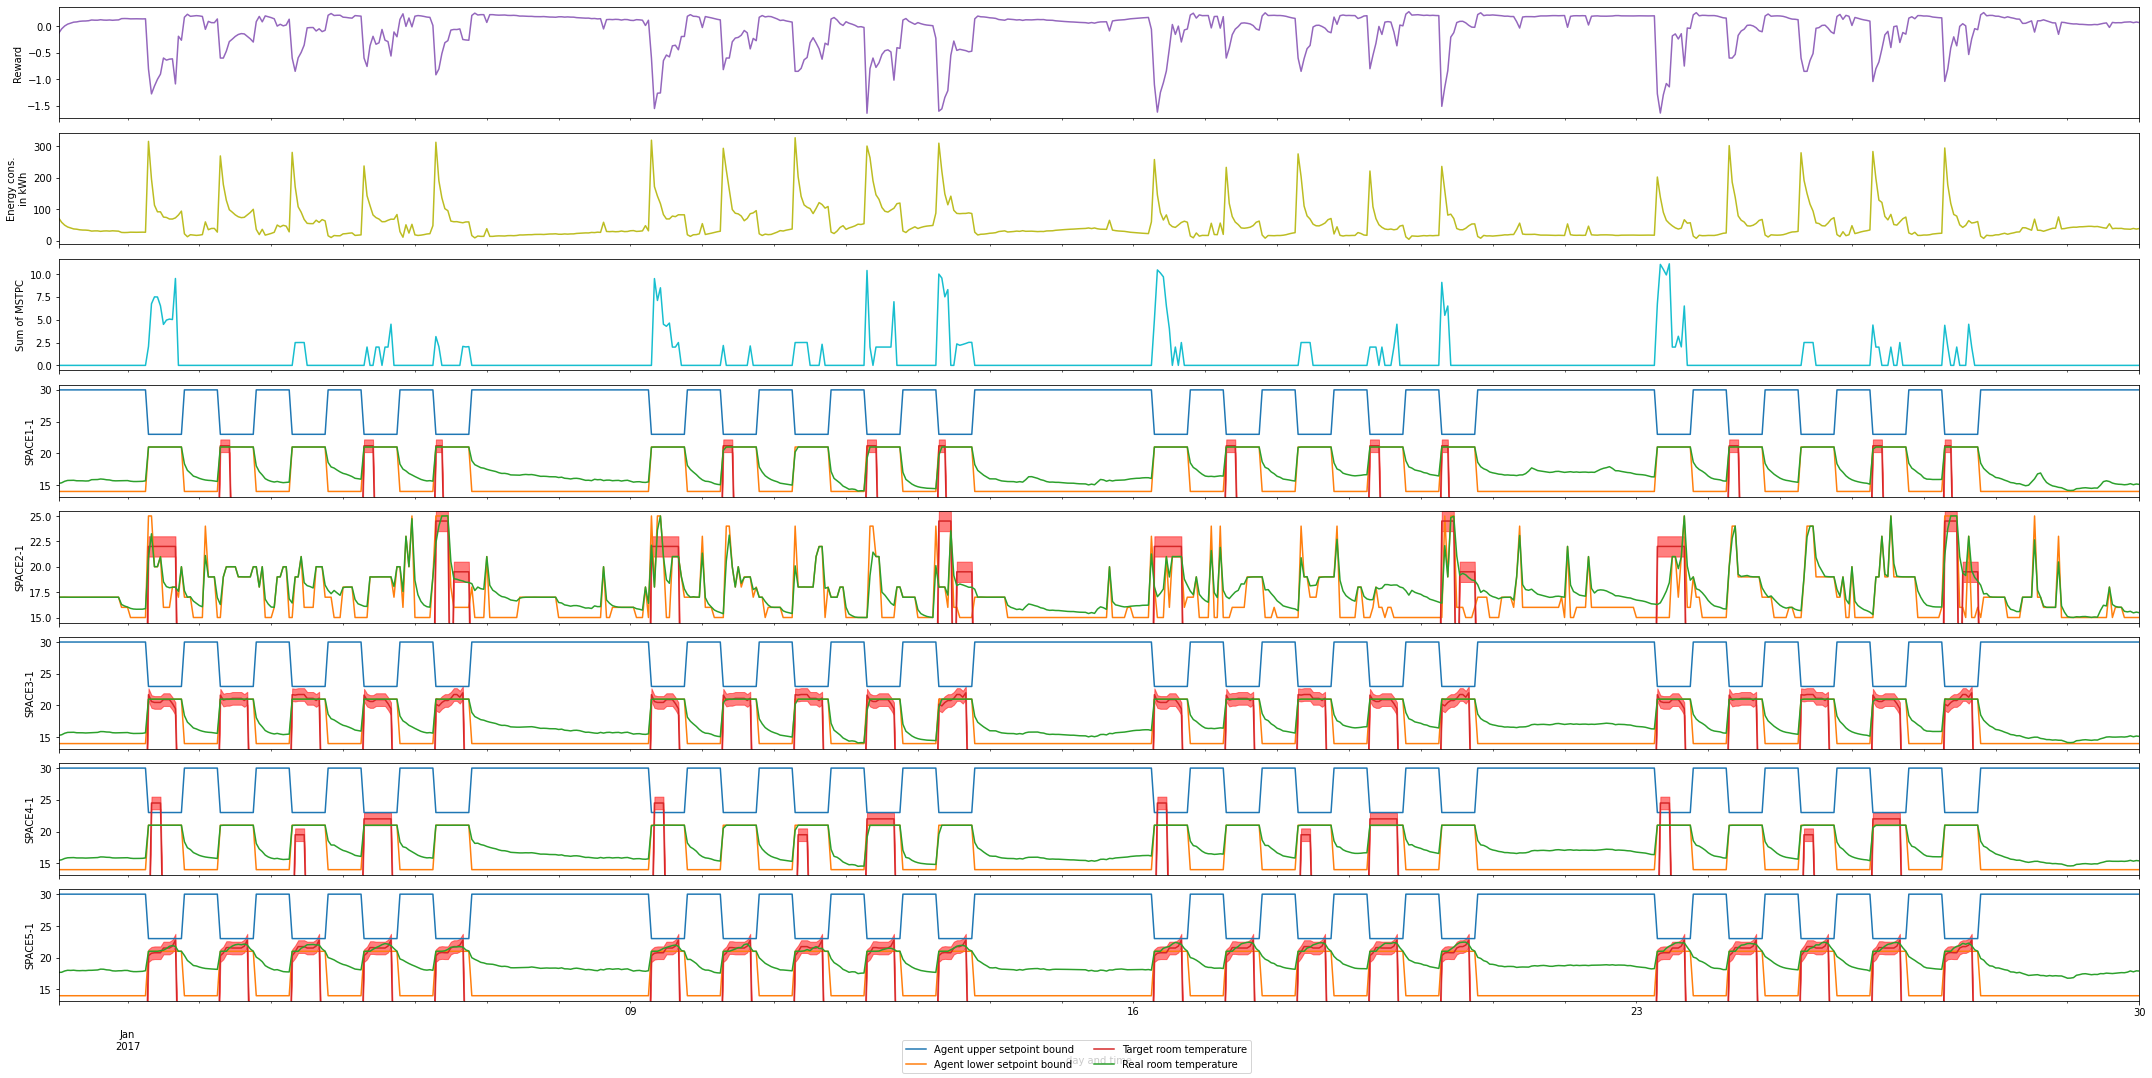

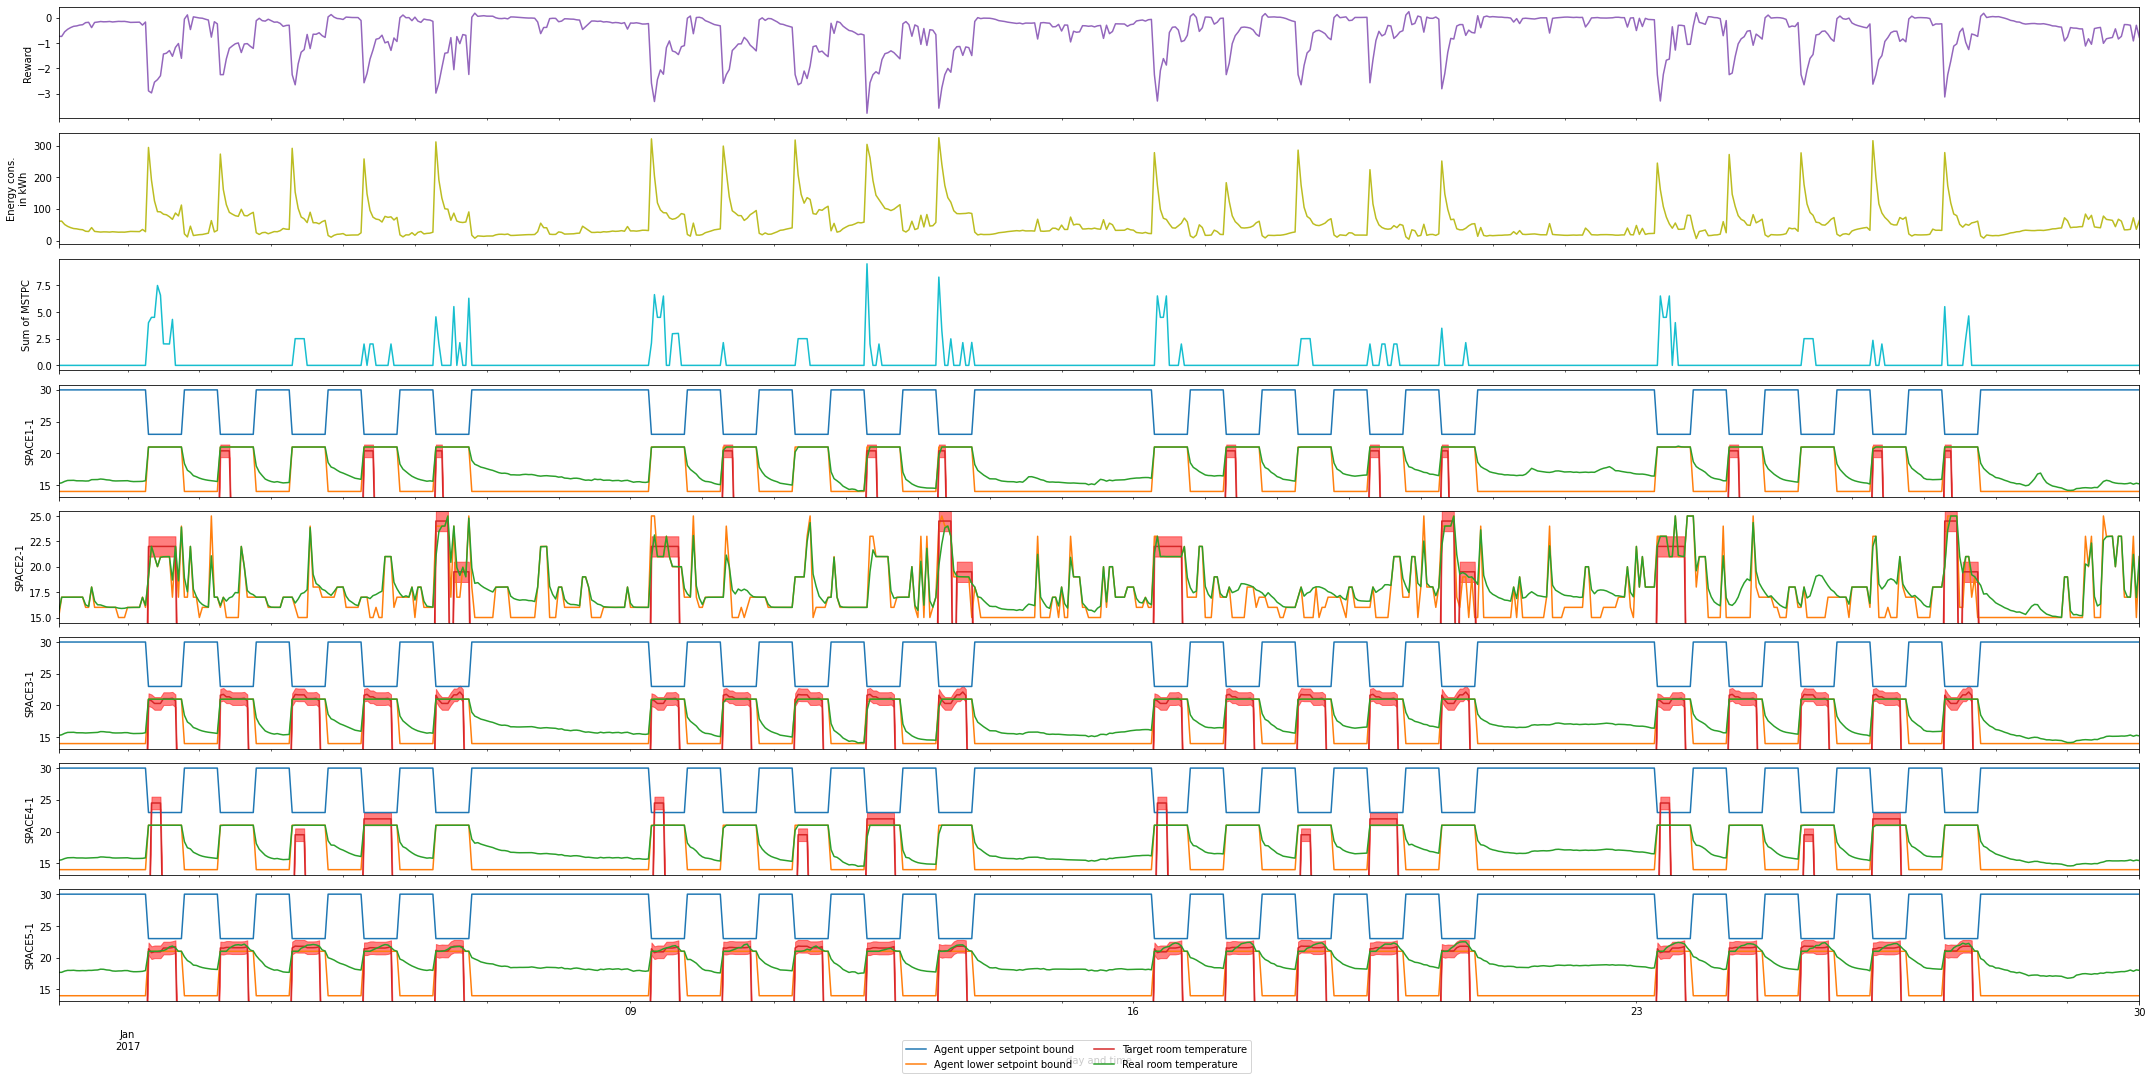

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

No q-values available for scenario 1: s301, agent 1
No q-values available for scenario 1: s301, agent 2
No q-values available for scenario 1: s301, agent 3
No q-values available for scenario 1: s301, agent 4
No q-values available for scenario 2: s301-faster, agent 1
No q-values available for scenario 2: s301-faster, agent 2
No q-values available for scenario 2: s301-faster, agent 3
No q-values available for scenario 2: s301-faster, agent 4
No q-values available for scenario 3: s302, agent 1
No q-values available for scenario 3: s302, agent 2
No q-values available for scenario 3: s302, agent 3
No q-values available for scenario 3: s302, agent 4


(<Figure size 2160x648 with 6 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s301\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s301-faster\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 3: s302\nAgent 0'>], dtype=object))

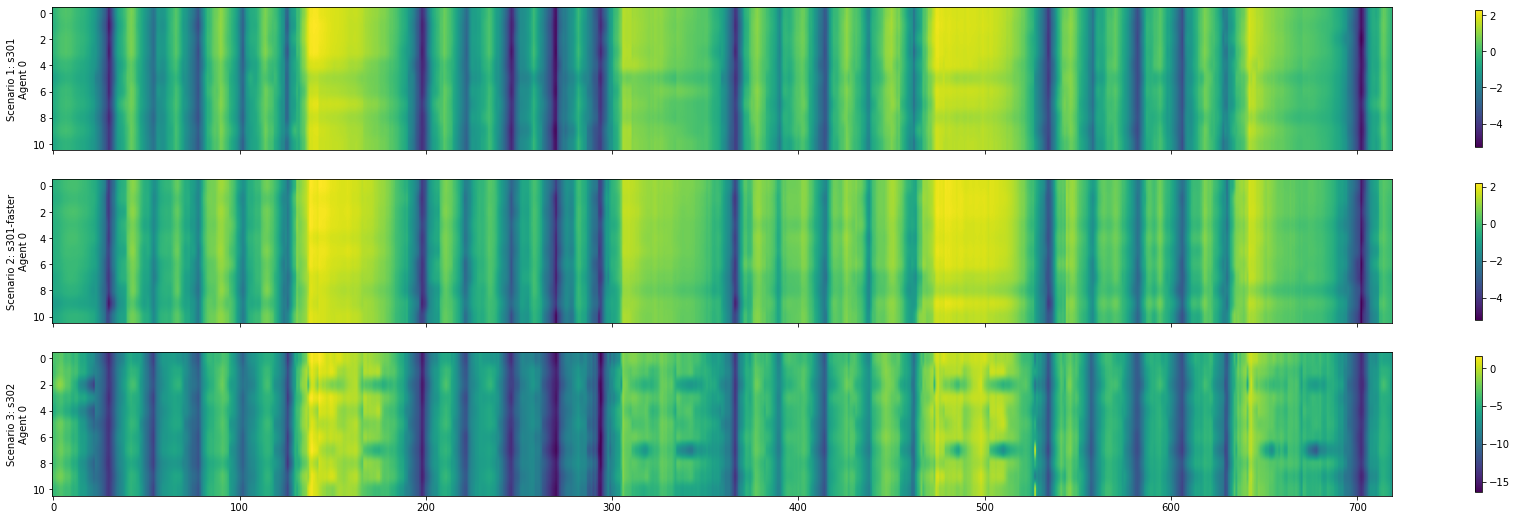

In [33]:
vh.plot_q_values(q_values, fig_width)

<h3>Reward analysis</h3> for s302

In [34]:
clip_level_1 = 125
clip_level_2 = 80

In [35]:
econs = subdfs[-1]['sees'].loc[:, 'energy_Wh']/1000
econs_clipped = econs.clip(0,150)
econs_diff    = econs.diff(periods = 1)
econs_diff_cl = econs_diff.clip(-clip_level_1,clip_level_1)
econs_diff_cl2= econs_diff.clip(-clip_level_2,clip_level_2)
#orig_from_clipped_diff = econs_diff_cl.cumsum()

<AxesSubplot:>

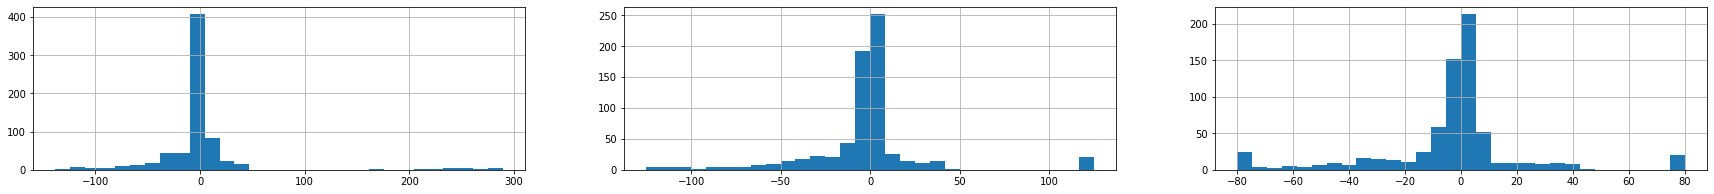

In [36]:
_, ax = plt.subplots(nrows=1,ncols=3, figsize=(fig_width, 3))
econs_diff.hist(bins=30,ax=ax[0])
econs_diff_cl.hist(bins=30,ax=ax[1])
econs_diff_cl2.hist(bins=30,ax=ax[2])

(-80.0, 80.0)

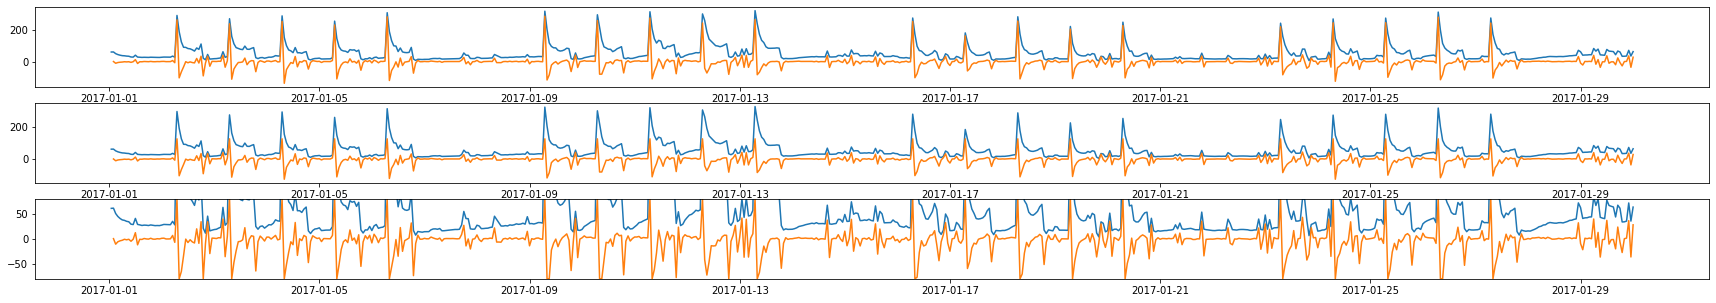

In [37]:
_, ax = plt.subplots(nrows=3, ncols=1, figsize=(fig_width, 5))
ax[0].plot(econs)
ax[0].plot(econs_diff)
ax[1].plot(econs)
ax[1].plot(econs_diff_cl)
ax[2].plot(econs)
ax[2].plot(econs_diff_cl2)
ax[2].set_ylim(-clip_level_2, clip_level_2)

outputs for thesis

In [38]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

In [42]:
subdfs_rooms[1] = ['SPACE1-1', 'SPACE2-1']

In [44]:
subdfs_agents[1]

{'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4}

In [50]:
import matplotlib.lines as mlines

/proj/ciptmp/me14miju/pyenvs/masterarbeit37-update/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


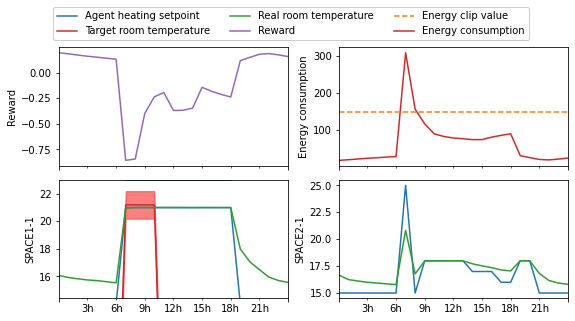

In [96]:
p, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(8,4))
vh.plot_room_temp_agent_setpoint(subdfs[1], 'SPACE1-1', 4, axes[1,0], fill_between=True, heating_setpoint_color='tab:blue')
vh.plot_room_temp_agent_setpoint(subdfs[1], 'SPACE2-1', 0, axes[1,1], fill_between=True, heating_setpoint_color='tab:blue')
subdfs[1]['sees'].loc[:,   "reward"].plot(ax=axes[0,0], label="Reward", color="tab:purple")
(subdfs[1]['sees'].loc[:,   "energy_Wh"]/1000).plot(ax=axes[0,1], label="Reward", color="tab:red")
subdfs[1]['sees']["const_1"] = 150.0
subdfs[1]['sees'].loc[:,   "const_1"].plot(ax=axes[0,1], label="Reward", color="tab:orange", linestyle='--')

purple_patch = mlines.Line2D([], [], color='tab:purple', label='Reward', linestyle='-')
orange_path  = mlines.Line2D([], [], color='tab:orange', label='Energy clip value', linestyle='--')
olive_patch   = mlines.Line2D([], [], color='tab:red', label='Energy cons.', linestyle='-')

handles, labels = axes[1,1].get_legend_handles_labels()
handles.append(purple_patch)
labels.append("Reward")
handles.append(orange_path)
labels.append("Energy clip value")
handles.append(olive_patch)
labels.append("Energy consumption")

axes[1,0].set_ylim((14.4,23))

axes[0,0].set_ylabel("Reward")
axes[0,1].set_ylabel("Energy consumption")
axes[1,0].set_xlabel("")
axes[1,1].set_xlabel("")

#axes[1,0].set_xticklabels(["A", "B"])
axes[1,0].xaxis.set_minor_formatter(plt.FixedFormatter([f"{i}h" for i in range(3,24,3)]))
axes[1,0].xaxis.set_major_formatter(plt.FixedFormatter([]))

p.legend(handles, labels, loc='upper center', ncol=3, framealpha=1, bbox_to_anchor=(0.5,1.12))
p.tight_layout()
p.show()
p.savefig("saved_plots/MA_s301_TestDay_selection.png", bbox_inches="tight")
p.savefig("saved_plots/MA_s301_TestDay_selection.pdf", bbox_inches="tight")